In [25]:
from uniswappy import *
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [26]:
# from math import sqrt

# class UniswapImpLoss:
#     def __init__(self, lp, lp_init_amt, lwr_tick = None, upr_tick = None):
#         self.lp = lp
#         self.lp_init = lp_init_amt
#         self.x_tkn_init = self._calc_dx(lp_init_amt, upr_tick)
#         self.y_tkn_init = self._calc_dy(lp_init_amt, lwr_tick)

#     def current_position_value(self, tkn, lwr_tick = None, upr_tick = None):
#         """Calculate the current value of the LP position in terms of input token.""" 
#         return LPQuote(False).get_amount_from_lp(self.lp, tkn, self.lp_init, lwr_tick, upr_tick)

#     def hold_value(self, tkn):
#         """Calculate the value if initial tokens were held."""
#         tokens = self.lp.factory.token_from_exchange[self.lp.name]
#         if(tkn.token_name == self.lp.token0):
#             current_price = self.lp.get_price(tokens[self.lp.token1])
#             val = self.y_tkn_init*current_price + self.x_tkn_init
#         elif(tkn.token_name == self.lp.token1):   
#             current_price = self.lp.get_price(tokens[self.lp.token0])
#             val = self.x_tkn_init * current_price + self.y_tkn_init
#         return val 

#     def get_init_amt(self, tkn):
#         if(tkn.token_name == self.lp.token0):
#             return self.x_tkn_init
#         elif(tkn.token_name == self.lp.token1):  
#             return self.y_tkn_init

#     def apply(self, lwr_tick = None, upr_tick = None, fees = False):

#         if(fees):
#             """Calculate returns based current position."""
#             tokens = self.lp.factory.token_from_exchange[self.lp.name]
#             x_tkn = tokens[self.lp.token0]
#             v_hold = self.hold_value(x_tkn)
#             v_pos = self.current_position_value(x_tkn, lwr_tick, upr_tick)
#             iloss = (v_pos - v_hold)/v_hold
#         else:
#             """Calculate IL based on price ratio."""
#             tokens = self.lp.factory.token_from_exchange[self.lp.name]
#             x_tkn = tokens[self.lp.token0]
#             y_tkn = tokens[self.lp.token1]
#             initial_price = self.y_tkn_init / self.x_tkn_init
#             current_price = self.lp.get_price(x_tkn)
#             alpha = current_price / initial_price
#             if(self.lp.version == 'V2'):
#                 iloss = self.calc_iloss(alpha)
#             elif(self.lp.version == 'V3'):    
#                 r = self.calc_price_range(lwr_tick, upr_tick)
#                 iloss = self.calc_iloss(alpha, r)       

#         return iloss

#     def calc_iloss(self, alpha, r = None):
#         if(r == None):
#             return (2 * sqrt(alpha)) / (1 + alpha) - 1
#         else:
#             iloss = (2 * sqrt(alpha)) / (1 + alpha) - 1
#             scale =  sqrt(r)/(sqrt(r)-1)
#             return scale*iloss 

#     def calc_price_range(self, lwr_tick, upr_tick):
#         Q96 = 2**96
#         sqrtp_cur = self.lp.slot0.sqrtPriceX96/Q96
#         sqrtp_pb = TickMath.getSqrtRatioAtTick(upr_tick)/Q96
#         sqrtp_pa = TickMath.getSqrtRatioAtTick(lwr_tick)/Q96
#         ra = sqrtp_pa**2/sqrtp_cur**2
#         rb = sqrtp_pb**2/sqrtp_cur**2    
#         return sum([ra,rb])/2

#     def _calc_dx(self, dL, upr_tick = None):
#         if(self.lp.version == 'V2'):
#             return self._calc_univ2_dx(dL)
#         elif(self.lp.version == 'V3'): 
#             return self._calc_univ3_dx(dL, upr_tick)

#     def _calc_dy(self, dL, lwr_tick = None):
#         if(self.lp.version == 'V2'):
#             return self._calc_univ2_dy(dL)
#         elif(self.lp.version == 'V3'): 
#             return self._calc_univ3_dy(dL, lwr_tick)
        
#     def _calc_univ2_dx(self, dL):
#         tokens = self.lp.factory.token_from_exchange[self.lp.name]
#         x_tkn = tokens[self.lp.token0]
#         x = self.lp.get_reserve(x_tkn)
#         L = self.lp.get_liquidity()
#         return x*dL/L

#     def _calc_univ2_dy(self, dL):
#         tokens = self.lp.factory.token_from_exchange[self.lp.name]
#         y_tkn = tokens[self.lp.token1]
#         y = self.lp.get_reserve(y_tkn)
#         L = self.lp.get_liquidity()
#         return y*dL/L
    
#     def _calc_univ3_dx(self, dL, upr_tick):
#         Q96 = 2**96
#         sqrtp_pb = TickMath.getSqrtRatioAtTick(upr_tick)/Q96
#         sqrtp_cur = self.lp.slot0.sqrtPriceX96/Q96
#         dPx = (1/sqrtp_cur - 1/sqrtp_pb)     
#         return dL*dPx

#     def _calc_univ3_dy(self, dL, lwr_tick):
#         Q96 = 2**96
#         sqrtp_pa = TickMath.getSqrtRatioAtTick(lwr_tick)/Q96
#         sqrtp_cur = self.lp.slot0.sqrtPriceX96/Q96
#         dPy = (sqrtp_cur - sqrtp_pa) 
#         return dL*dPy

In [27]:
# Instantiation Parameters
n_steps = 500     # Number of steps 
start_price = 10 # Initial price SYS/USD
mu = 0.1; sigma = 0.5
n_paths = 1      # Number of simulationed paths
seconds_year = 31536000

# Brownian Model 
bm = BrownianModel(start_price)
p_arr = bm.gen_gbms(mu, sigma, n_steps-1, n_paths).flatten()

dt = datetime.timedelta(seconds=seconds_year/n_steps)
dates = [datetime.datetime.strptime("2024-09-01", '%Y-%m-%d') + k*dt for k in range(n_steps)]

In [28]:
user_nm = 'user0'
tkn1_amount = 1000
tkn2_amount = p_arr[0]*tkn1_amount

fee = UniV3Utils.FeeAmount.MEDIUM
tick_spacing = UniV3Utils.TICK_SPACINGS[fee]
lwr_tick = UniV3Utils.getMinTick(tick_spacing)
upr_tick = UniV3Utils.getMaxTick(tick_spacing)

In [29]:
tkn1_nm = 'TKN1'
tkn2_nm = 'TKN2'

tkn1 = ERC20(tkn1_nm, "0x09")
tkn2 = ERC20(tkn2_nm, "0x111")

exchg_data = UniswapExchangeData(tkn0 = tkn1, tkn1 = tkn2, symbol="LP",
                                   address="0x011", version = 'V3',
                                   tick_spacing = tick_spacing,
                                   fee = fee)

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)

Join().apply(lp, user_nm, tkn1_amount, tkn2_amount, lwr_tick, upr_tick)
lp.summary()

Exchange TKN1-TKN2 (LP)
Real Reserves:   TKN1 = 999.9999999999999, TKN2 = 10000.0
Gross Liquidity: 3162.277660168379 



In [30]:
tick_size = 10000
lwr_tick = UniV3Helper().get_price_tick(lp, -1, lp.get_price(tkn1), tick_size)
upr_tick = UniV3Helper().get_price_tick(lp, 1, lp.get_price(tkn1), tick_size)  
out = AddLiquidity().apply(lp, tkn1, user_nm, 10, lwr_tick, upr_tick)
lp.summary()

dL = lp.last_liquidity_deposit
iLoss = UniswapImpLoss(lp, dL, lwr_tick, upr_tick)

Exchange TKN1-TKN2 (LP)
Real Reserves:   TKN1 = 1009.9999999999999, TKN2 = 10100.262769858964
Gross Liquidity: 3242.81759104987 



In [31]:
tkn1_init_amt = iLoss.get_init_amt(tkn1)
tkn2_init_amt = iLoss.get_init_amt(tkn2)
tkn1_hold_amt = iLoss.hold_value(tkn1)
tkn2_hold_amt = iLoss.hold_value(tkn2)

print(f'Initial {tkn1.token_name} amount: {tkn1_init_amt:.2f}, Initial {tkn2.token_name} amount: {tkn2_init_amt:.2f}')
print(f'Hold {tkn1.token_name} amount: {tkn1_hold_amt:.2f}, Hold {tkn2.token_name} amount: {tkn2_hold_amt:.2f}')

Initial TKN1 amount: 10.00, Initial TKN2 amount: 100.26
Hold TKN1 amount: 20.03, Hold TKN2 amount: 200.26


In [32]:
tick_size = 100000
arb = CorrectReserves(lp, x0 = p_arr[0])
TKN_amt = TokenDeltaModel(100)
pTKN1_TKN2_arr = []; 

for k in range(n_steps):

    # *****************************
    # ***** Random Swapping ******
    # *****************************
    Swap().apply(lp, tkn1, user_nm, TKN_amt.delta())
    Swap().apply(lp, tkn2, user_nm, p_arr[k]*TKN_amt.delta())
    
    # *****************************
    # ***** Rebalance ******
    # *****************************

    lwr_tick = UniV3Helper().get_price_tick(lp, -1, lp.get_price(tkn1), tick_size)
    upr_tick = UniV3Helper().get_price_tick(lp, 1, lp.get_price(tkn1), tick_size)   
    arb.apply(p_arr[k], lwr_tick, upr_tick)

    # *****************************
    # ******* Data Capture ********
    # *****************************
    pTKN1_TKN2_arr.append(LPQuote().get_price(lp, tkn1))

lp.summary()

Exchange TKN1-TKN2 (LP)
Real Reserves:   TKN1 = 1507.1610994256193, TKN2 = 10021.81247893216
Gross Liquidity: 3809.034523592641 



In [33]:
tkn1_hold_amt = iLoss.hold_value(tkn1)
tkn2_hold_amt = iLoss.hold_value(tkn2)
tkn1_pos_amt = iLoss.current_position_value(tkn1, lwr_tick, upr_tick)
tkn2_pos_amt = iLoss.current_position_value(tkn2, lwr_tick, upr_tick)

print(f'{tkn1.token_name} hold amt: {tkn1_hold_amt:.2f}, {tkn2.token_name} hold amt: {tkn2_hold_amt:.2f}')
print(f'{tkn1.token_name} position amt: {tkn1_pos_amt:.2f}, {tkn2.token_name} position amt: {tkn2_pos_amt:.2f}')
print(f'Start price: {p_arr[0]:.2f}, End price: {p_arr[-1]:.2f}')

TKN1 hold amt: 25.06, TKN2 hold amt: 166.85
TKN1 position amt: 61.26, TKN2 position amt: 407.92
Start price: 10.00, End price: 6.66


In [34]:
iloss_calc = iLoss.apply(lwr_tick, upr_tick, fees = False)
returns_calc = iLoss.apply(lwr_tick, upr_tick, fees = True)

print(f'Imp Loss: {100*iloss_calc:.2f}%, returns: {100*returns_calc:.2f} %')

Imp Loss: -2.08%, returns: 144.49 %


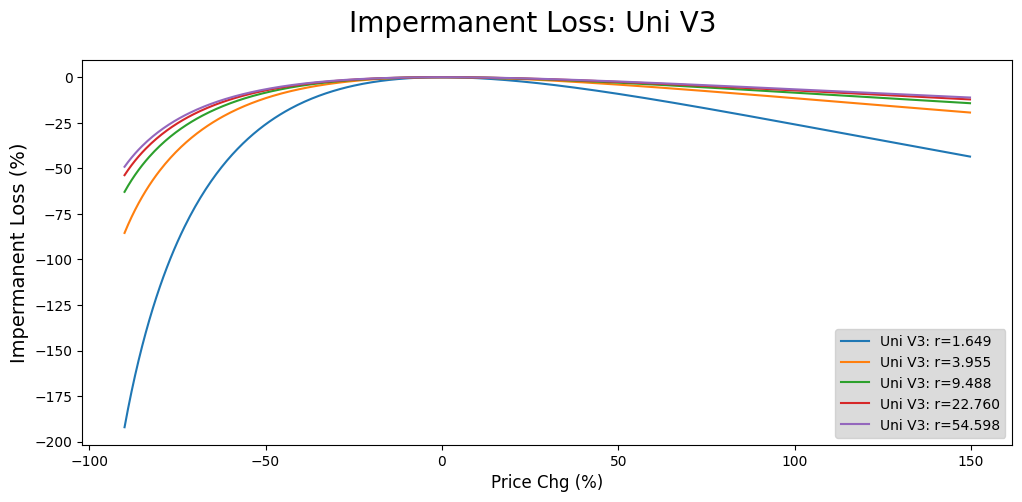

In [35]:
n_steps = 1000
alphas = np.linspace(0, 5, num=n_steps)
alpha_deltas = alphas-1

imp_losses = []
r_arr = np.exp(np.linspace(0.5, 4, num=5))
for r in r_arr: 
    imp_loss = np.array([iLoss.calc_iloss(alpha, r) for alpha in alphas])
    imp_losses.append(imp_loss)

m0 = 20; m1 = 500
fig, (lp_ax) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 5))
fig.suptitle(f'Impermanent Loss: Uni V3', fontsize=20)

for k, imp_loss in enumerate(imp_losses):
    #lp_ax.plot(100*alphas[m0:-m1]-100, 100*imp_loss[m0:-m1]/max(imp_loss[m0:-m1])-1, label = f'Uni V3: r={r_arr[k]:.3f}') 
    lp_ax.plot(100*alphas[m0:-m1]-100, 100*imp_loss[m0:-m1], label = f'Uni V3: r={r_arr[k]:.3f}') 
    lp_ax.set_xlabel("Price Chg (%)", fontsize=12)
    lp_ax.set_ylabel("Impermanent Loss (%)", fontsize=14)  
lp_ax.legend(fontsize=10, facecolor="lightgray", loc='lower right')

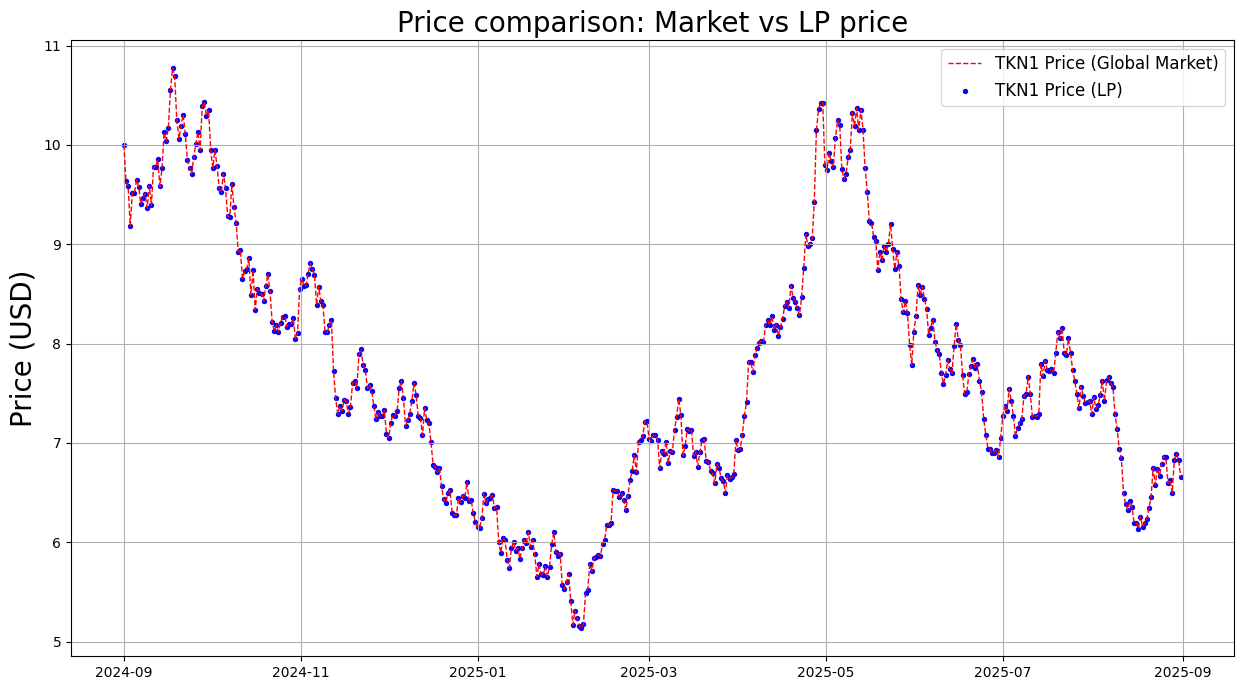

In [36]:
fig, (TKN_ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(15, 8))

TKN_ax.plot(dates, p_arr, color = 'r',linestyle = 'dashed', linewidth=1, label=f'{tkn1_nm} Price (Global Market)')
TKN_ax.scatter(dates, pTKN1_TKN2_arr, s=10, marker='o', color = 'b',linestyle = '-', linewidth=0.7, label=f'{tkn1_nm} Price (LP)')

TKN_ax.set_title('Price comparison: Market vs LP price', fontsize=20)
TKN_ax.set_ylabel('Price (USD)', size=20)
TKN_ax.legend(fontsize=12)
TKN_ax.grid()